In [6]:
#import all packages 
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import math

cluster_guess=3 


In [12]:
#create 2D array
# 6 dimension because: x-value, y-value, the closest centroid, distance to centroids, ....
centroids = np.zeros((cluster_guess,8))


print("cur_x", "cur_y", "old_x", "old_y", "counter", "score_x", "score_y", "number of centroid")
print(centroids)

#initialize centroids:
def init_centroids(centroids):
    for counter_centroids, row in enumerate(centroids):
        row[0]=random.uniform(0,10)
        row[1]=random.uniform(0,10)
        row[7]=counter_centroids+1
        
init_centroids(centroids) 
#centroids werden durchnummeriert (number of centroid) A=1, B=2, ....
print("cur_x", "cur_y", "old_x", "old_y", "counter", "score_x", "score_y", "number of centroid")
print(centroids)
        

cur_x cur_y old_x old_y counter score_x score_y number of centroid
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
cur_x cur_y old_x old_y counter score_x score_y number of centroid
[[7.17922908 5.28383165 0.         0.         0.         0.
  0.         1.        ]
 [4.42395974 8.4692401  0.         0.         0.         0.
  0.         2.        ]
 [6.96590461 7.10280075 0.         0.         0.         0.
  0.         3.        ]]


In [17]:
#load data
#create 3 clusters of randomly distributed points

#create emty arrays of right size
cluster_x = np.zeros((300,1))
cluster_1_x =  np.zeros((100, 1))
cluster_2_x =  np.zeros((100, 1))
cluster_3_x =  np.zeros((100, 1))

cluster_y = np.zeros((300,1))
cluster_1_y =  np.zeros((100, 1))
cluster_2_y =  np.zeros((100, 1))
cluster_3_y =  np.zeros((100, 1))

#fill array with randomly chosen x-/ y-values
#points are choosen around perfekt centroid:
# 1: 2, 2
# 2: 8, 2
# 3: 2, 8
for x in range(100):
    cluster_1_x[x] = random.uniform(0, 10)
    
for x in range(100):
    cluster_2_x[x] = random.uniform(0, 10)
    
for x in range(100):
    cluster_3_x[x] = random.uniform(0, 10)
    
for x in range(100):
    cluster_1_y[x] = random.uniform(0, 10)
    
for x in range(100):
    cluster_2_y[x] = random.uniform(0, 10)
    
for x in range(100):
    cluster_3_y[x] = random.uniform(0, 10)

    
#concentrate cluster_1/ 2/ 3 into one array for x and y each
cluster_x = np.concatenate((cluster_1_x, cluster_2_x), axis=0)
cluster_x = np.concatenate((cluster_x, cluster_3_x), axis=0)

cluster_y = np.concatenate((cluster_1_y, cluster_2_y), axis=0)
cluster_y = np.concatenate((cluster_y, cluster_3_y), axis=0)


#create 2D array
# 6 dimension because: x-value, y-value, the closest centroid, distance to centroids, ....
array = np.zeros((300,6))

#counter to go through x and y array
x_counter=0
y_counter=0


#load 2D array with dara
for counter_load, row in enumerate(array):
    row[0]=cluster_x[x_counter]
    row[1]=cluster_y[y_counter]
    x_counter+=1
    y_counter+=1
    

In [18]:
#function which prints all points in their colour corresbonding to their closest centroid
#in first run through every point is printed in black
def plot_array():
    
    #label plot
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')

    #draw points
    for counter, value in enumerate(array):
        if value[2] == 0:
            plt.plot(value[0],value[1], 'ko', markersize=3)
            
        elif value[2] == 1:
            plt.plot(value[0],value[1], 'bo', markersize=3)
            
        elif value[2] == 2:
            plt.plot(value[0],value[1], 'go', markersize=3)
            
        if value[2] == 3:
            plt.plot(value[0],value[1], 'ro', markersize=3)
    
    #centroids
    #TODO
    #dictionary mit values und farben damit variabel bunt markiert
    
    for counter, value in enumerate(centroids):
        if value[2] == 1:
            plt.plot(value[0],value[1], 'bx', markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
            
        elif value[2] == 2:
            plt.plot(value[0],value[1], 'mx', markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
            
        elif value[2] == 3:
            plt.plot(value[0],value[1], 'gx', markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
            
        if value[2] == 4:
            plt.plot(value[0],value[1], 'rx', markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
        
   
    

In [19]:
#measures distance between a x-/ y-value and centroid and returns distance
def distance_to_point(x, y, centroids):
    del_x = x-centroids[0] 
    del_y = y-centroids[1]
    del_x = -del_x if del_x<0 else del_x
    del_y = -del_y if del_y<0 else del_y
    distance = math.sqrt(del_x**2 + del_y**2)
    return distance

#measures distance between a x-/ y-value and centroid and returns distance
def measure_distance():
    
    for counter_array, value in enumerate(array):
        for counter_centroids, value_2 in enumerate(centroids):
            value[counter_centroids + 3] = distance_to_point(value[0], value[1], counter_centroids)

    

In [16]:
#measure closest centroid and assigns to array
#closest centroid a=1, b=2, c=3
def closest_centroid():
    for counter_array, value in enumerate(array):
        distance_a = value[3]
        distance_b = value[4]
        distance_c = value[5]
    
        if distance_a < distance_b and distance_a < distance_c:
            value[2] = 1
            
        elif distance_b < distance_a and distance_b < distance_c:
            value[2] = 2
            
        elif distance_c < distance_b and distance_c < distance_a:
            value[2] = 3
        
        else:
            print("Error: two identical distances at ponit:  " + str(counter_array +1))
        

In [21]:
#für die centroiden werden die x und y koordinaten der zugehörigen punkte addiert und durch die Anzahl der zugeordneten Punkte geteilt
def reassign_centroid():
    
    #goes through the array and adds for each centroid the x-/ y-values and a counter to keep track of the number of inputs
    for counter_array, value in enumerate(array):
        for counter_centroids, value_2 in enumerate(centroids):
            
#print("cur_x", "cur_y", "old_x", "old_y", "counter", "score_x", "score_y", "number of centroid")
   
                if value[2] == 1:
                    centroids[value[2]-1:4] += 1
                    centroids[value[2]-1:5] += value[0]
                    centroids[value[2]-1:6] += value[1]
            
                elif value[2] == 2:
                    centroids[value[2]-1:4] += 1
                    centroids[value[2]-1:5] += value[0]
                    centroids[value[2]-1:6] += value[1]
            
                elif value[2] == 3:
                    centroids[value[2]-1:4] += 1
                    centroids[value[2]-1:5] += value[0]
                    centroids[value[2]-1:6] += value[1]
        
    #note old points for evaluate_score()
    a.old_x = a.x
    a.old_y = a.y
    b.old_x = b.x
    b.old_y = b.y
    c.old_x = c.x
    c.old_y = c.y
    
    #if there are points assigned to each centroid
    #the centroids are reassigned
    if a.score_x != 0 and a.counter !=0:
        a.x = a.score_x / a.counter
        a.y = a.score_y / a.counter
    if b.score_x != 0 and b.counter !=0:
        b.x = b.score_x / b.counter
        b.y = b.score_y / b.counter
    if c.score_x != 0 and c.counter !=0:
        c.x = c.score_x / c.counter
        c.y = c.score_y / c.counter
    
   
    #resets values for the next reassign_centroid() / kmean runthrough
    a.counter = 0
    a.score_x = 0
    a.score_y = 0
    b.counter = 0
    b.score_x = 0
    b.score_y = 0
    c.counter = 0
    c.score_x = 0
    c.score_y = 0

In [7]:
#evaluate distance change of centroids
#by comparing centroids coordinates before and after reassign_centroids()
def evaluate_score():
    
    #simliar to distance_to_point() but for each centroid
    distance_a_x = a.old_x - a.x
    distance_a_y = a.old_y - a.y
    distance_b_x = b.old_x - b.x
    distance_b_y = b.old_y - b.y
    distance_c_x = c.old_x - c.x
    distance_c_y = c.old_y - c.y
    
    distance_a_x = -distance_a_x if distance_a_x<0 else distance_a_x
    distance_a_y = -distance_a_y if distance_a_y<0 else distance_a_y
    distance_a = math.sqrt(distance_a_x**2 + distance_a_x**2)
    
    distance_b_x = -distance_b_x if distance_b_x<0 else distance_b_x
    distance_b_y = -distance_b_y if distance_b_y<0 else distance_b_y
    distance_b = math.sqrt(distance_b_x**2 + distance_b_y**2)
    
    distance_c_x = -distance_c_x if distance_c_x<0 else distance_c_x
    distance_c_y = -distance_c_y if distance_c_y<0 else distance_c_y
    distance_c = math.sqrt(distance_c_x**2 + distance_c_y**2)
    
    #for less than 0.05% change of all centroids it stops the program
    min_value = 0.0005
    if distance_a < min_value and distance_b < min_value and distance_c < min_value:
        return 1
    else: 
        return 0
    

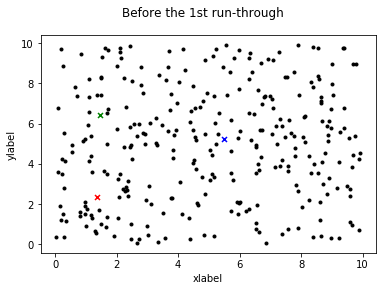

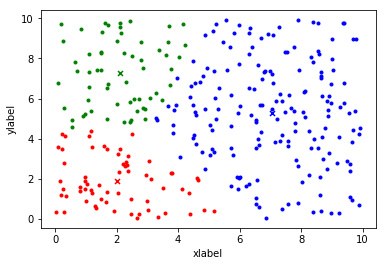

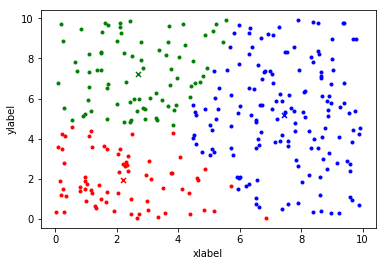

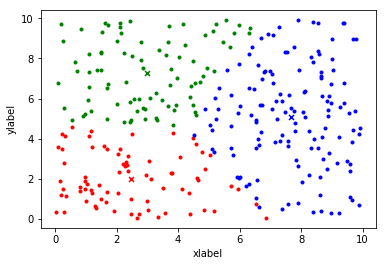

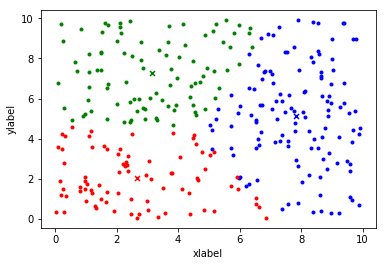

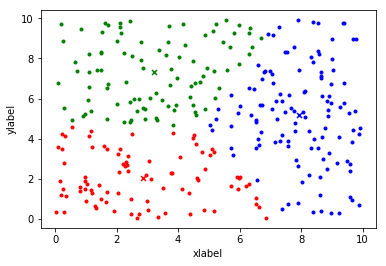

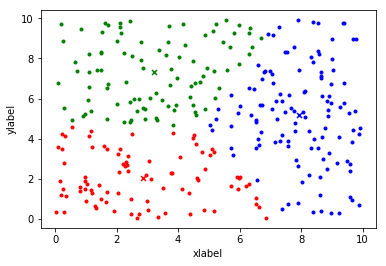

Programm stops after 6 runthroughs


In [8]:
plt.figure()
plt.suptitle('Before the 1st run-through')
plot_array()
plt.show()
counter_runs = 1
runner = 1


while runner:
    for i in range(1, 10):
        measure_distance()
        closest_centroid()
        reassign_centroid()
        plot_array()
        plt.show()
        if evaluate_score():
            runner=0
            break
        counter_runs += 1
        

print("Programm stops after " + str(counter_runs) + " runthroughs")